In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
   1/1875 ━━━━━━━━━━━━━━━━━━━━ 49:36 2s/step - accuracy: 0.0625 - loss: 2.3267

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.3677 - loss: 1.7417 - val_accuracy: 0.6778 - val_loss: 0.8513
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.5251 - loss: 1.3410 - val_accuracy: 0.6940 - val_loss: 0.8445
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.5636 - loss: 1.2446 - val_accuracy: 0.7069 - val_loss: 0.8010
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.5803 - loss: 1.2004 - val_accuracy: 0.7100 - val_loss: 0.7970
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.5915 - loss: 1.1696 - val_accuracy: 0.7059 - val_loss: 0.8409
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.6072 - loss: 1.1270 - val_accuracy: 0.7206 - val_loss: 0.7655
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.6019 - loss: 1.1285 - val_accuracy: 0.7134 - val_loss: 0.7914
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.6171 - loss: 1.10

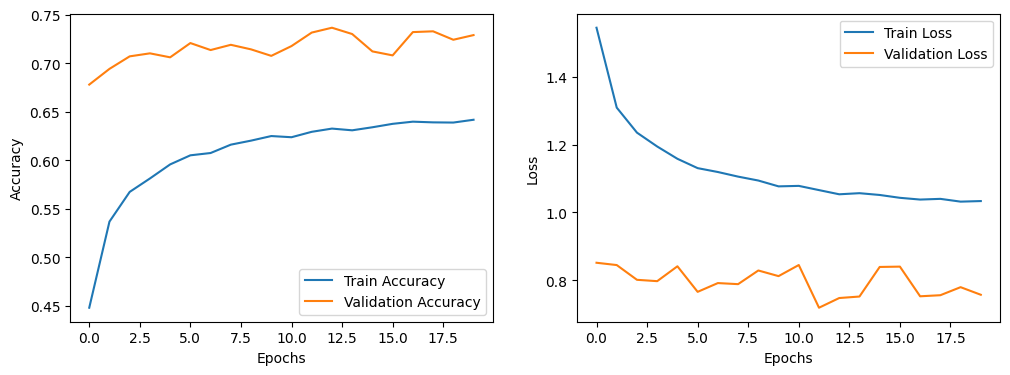

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


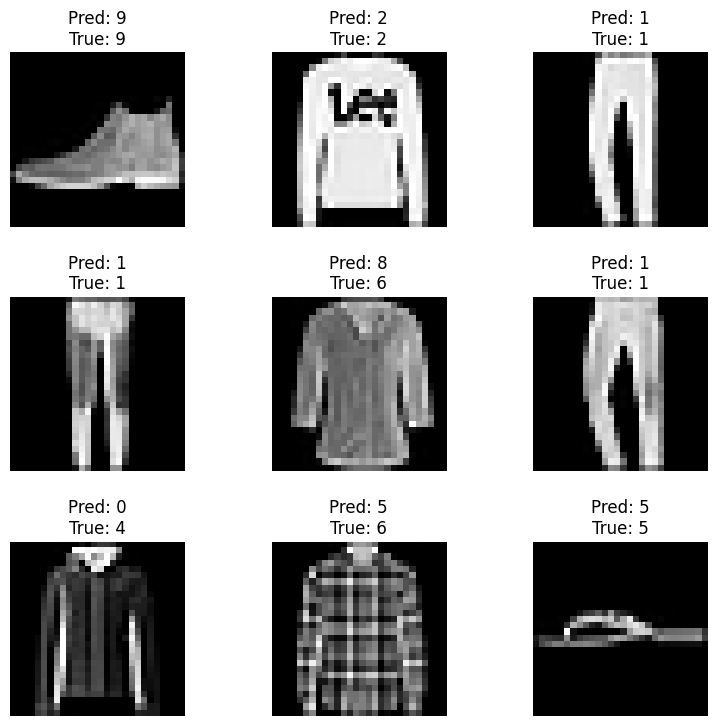

In [2]:

# Step 1: Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Step 2: Normalize the data to scale pixel values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Step 3: Reshape the data to include a channel dimension (for grayscale images)
x_train = np.expand_dims(x_train, axis=-1)  # Shape: (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, axis=-1)    # Shape: (10000, 28, 28, 1)

# Step 4: Apply PCA for Dimensionality Reduction
# Flatten the images for PCA
x_train_flattened = x_train.reshape(-1, 28*28)
x_test_flattened = x_test.reshape(-1, 28*28)

# Apply PCA to reduce dimensionality (e.g., to 100 components)
pca = PCA(n_components=100)
x_train_pca = pca.fit_transform(x_train_flattened)
x_test_pca = pca.transform(x_test_flattened)

# Reshape PCA-transformed data back to image format for CNN input
x_train_pca = x_train_pca.reshape(-1, 10, 10, 1)  # Reshaped to fit CNN input
x_test_pca = x_test_pca.reshape(-1, 10, 10, 1)

# Step 5: Data Augmentation (Apply transformations to training data)
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2
)

# Apply data augmentation to PCA-transformed training data
train_generator = train_datagen.flow(x_train_pca, y_train, batch_size=32)

# Step 6: Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(10, 10, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),  # Flatten the feature map to feed into Dense layers
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Step 7: Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 8: Train the model
history = model.fit(train_generator, epochs=20, validation_data=(x_test_pca, y_test))

# Step 9: Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test_pca, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

# Step 10: Visualize the results (training/validation accuracy and loss)
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Step 11: Display some sample predictions
y_pred = model.predict(x_test_pca)
y_pred_classes = np.argmax(y_pred, axis=1)

# Show some sample images and their predictions
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
axes = axes.ravel()

for i in np.arange(9):
    axes[i].imshow(x_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Pred: {y_pred_classes[i]}\nTrue: {y_test[i]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
plt.show()
